<a href="https://colab.research.google.com/github/Onkar-TAE/bike-sharing-demand-prediction-analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


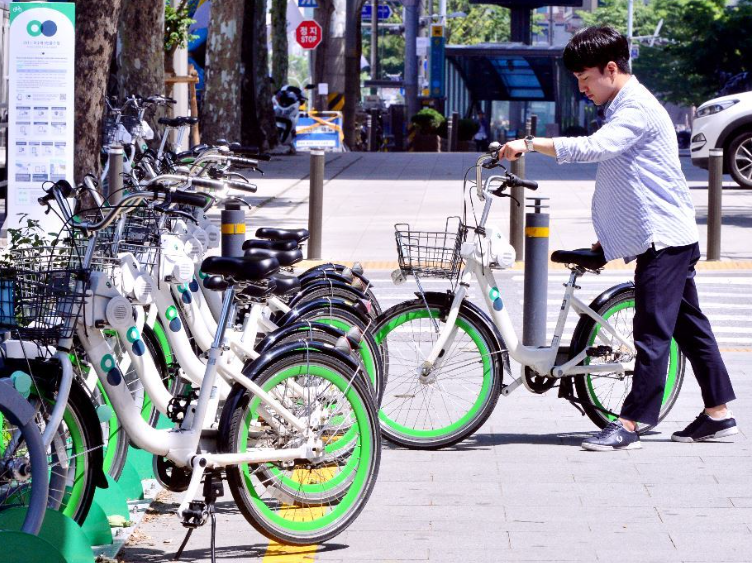

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  CSV file location path
file_path = '/content/drive/MyDrive/Alma Better-  Data Science Course/Capstone Project/2. ML Capstone Project - Regression Analysis/Data & Resources/SeoulBikeData.csv'

# Read CSV file.
df = pd.read_csv(file_path,encoding = "latin")

#**Data Exploration and Data Cleaning**

In [4]:
# To check 1st five rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# To check last five rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
#  To check shape of dataframe

df.shape

(8760, 14)

In [7]:
#  To check the info of dataset to know the data types of variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Observations
1 Null values/missing values- 0.

2 Date- columns need to convert into proper data type.

3 Columns to convert into numeric(for modelling Purpose)


*   seasons
*   holiday
*   functioning day






In [8]:
#  To check all the columns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Renaming Columns. 

df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [10]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date'] = df['Date'].astype('datetime64[ns]')


In [11]:

# Creating new columns 'Month', 'Year' ,'Day.
df['Month'] = df['Date'].dt.month

df['Day'] = df['Date'].dt.day_name()                  #dt.day_name() and dt.month_name()  will give day names and month names
                                                                # dt.month will give month numbers as 1,2,3,...12 

In [12]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend'] = df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
# check the Newly Created columns
df.head(2)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0

In [14]:
# Now We can Drop Day and Date columns.

df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [15]:
#Get distinct categories counts forSeasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
#Get distinct categories counts for Holiday categories
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
#Get distinct categories counts for Functioning_Day categories
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [18]:
#Get distinct categories counts for for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [19]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [20]:
# To Check the Summary of Bike data to egt mean,max,25%,50%,75% etc

df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        Month  Weekdays_or_weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

In [21]:
# To Check for Null values 
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

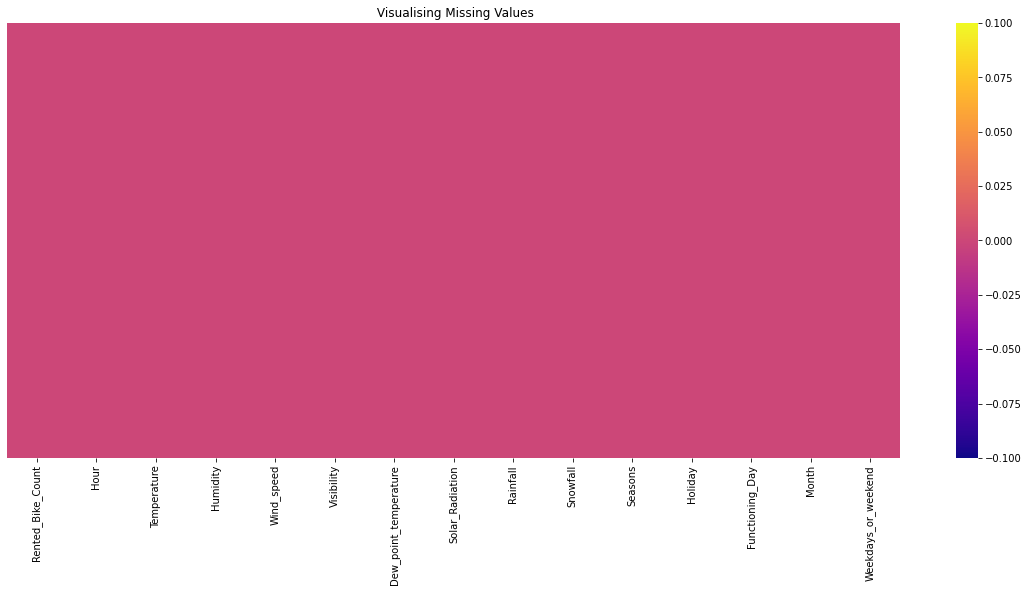

In [22]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [23]:
# Checking Duplicates
print(len(df[df.duplicated()]))

0


#**EDA**

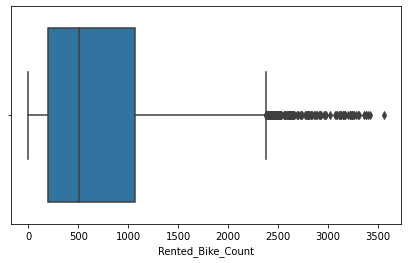

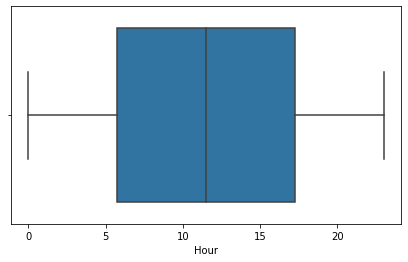

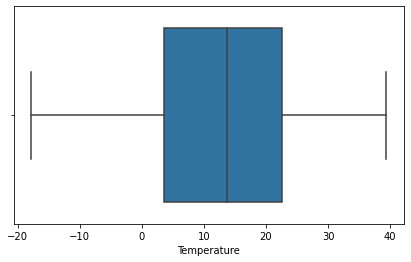

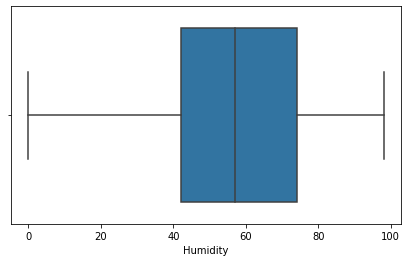

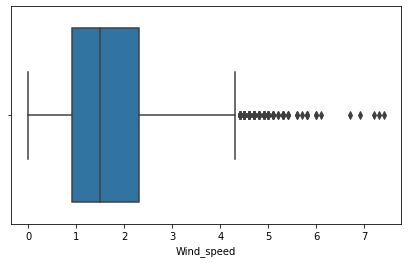

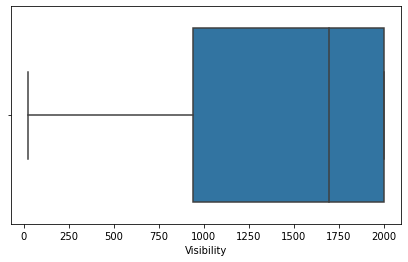

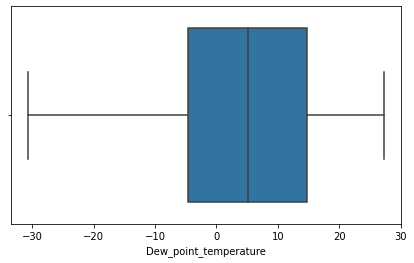

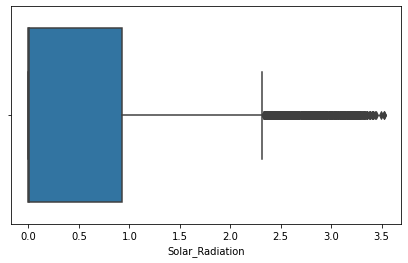

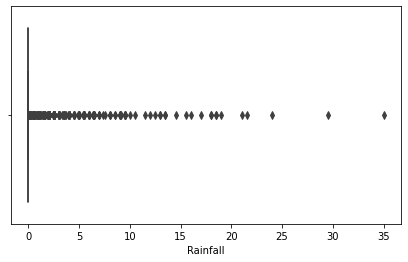

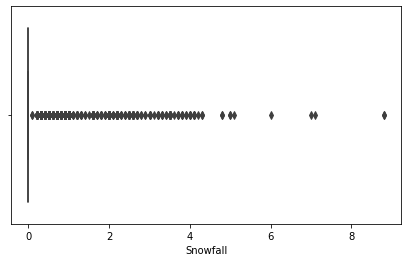

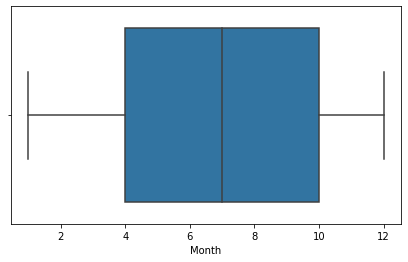

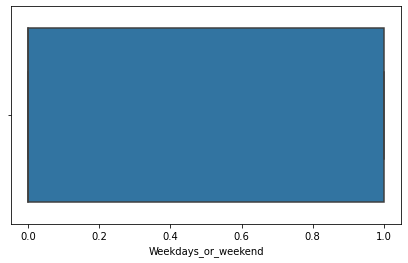

In [24]:
# create numeric columns list.
numeric_col = df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(df.columns) - set(df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    sns.boxplot(x=df[col])

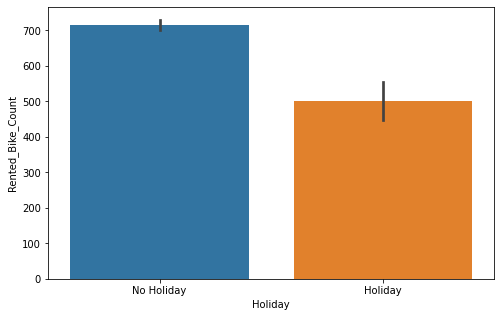

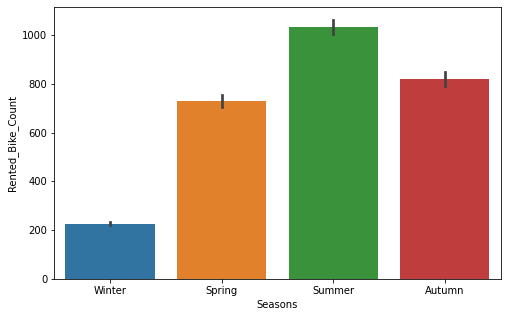

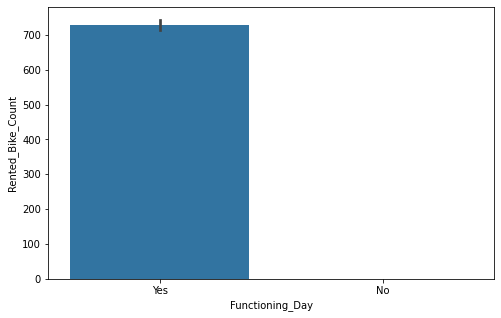

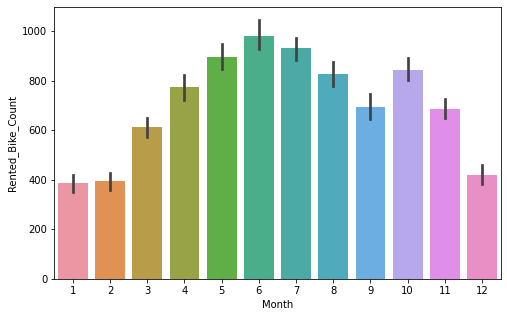

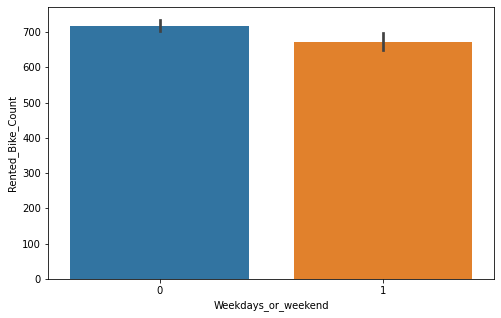

In [25]:
# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])

#Observations From Above Barcharts:
1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

5) From March Bike Rent Count started increasing and it was highest in June.

#Let's check Bike Rent Count trend with respect to Hour on Functioning days,weekends or weekdays,seasons,Holidays columns.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

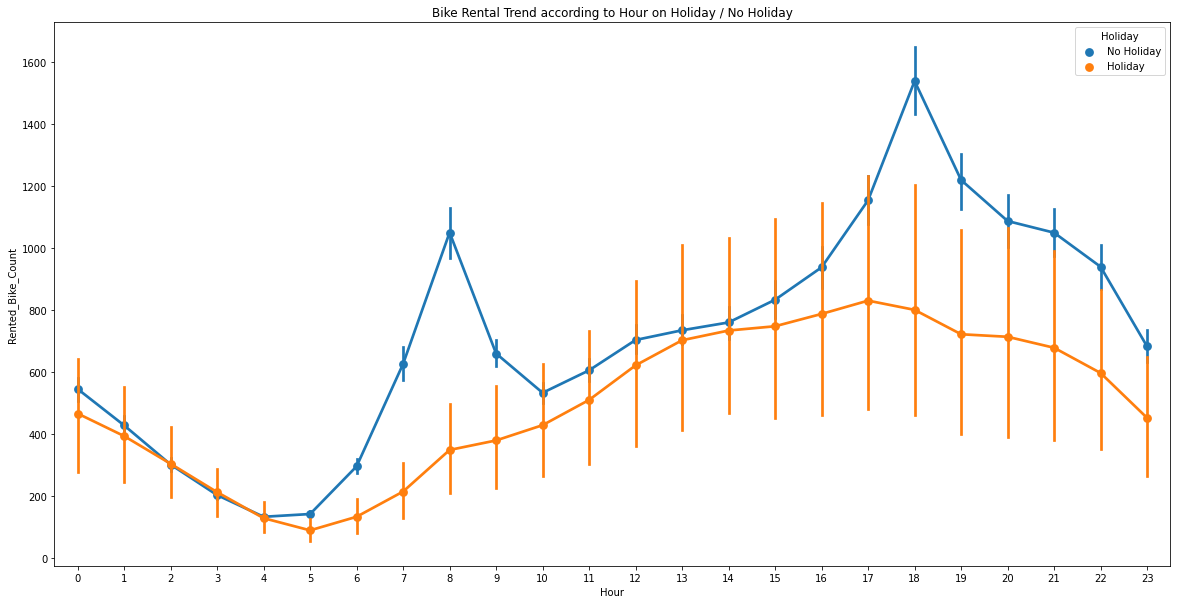

In [26]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

#Observation
1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).


Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

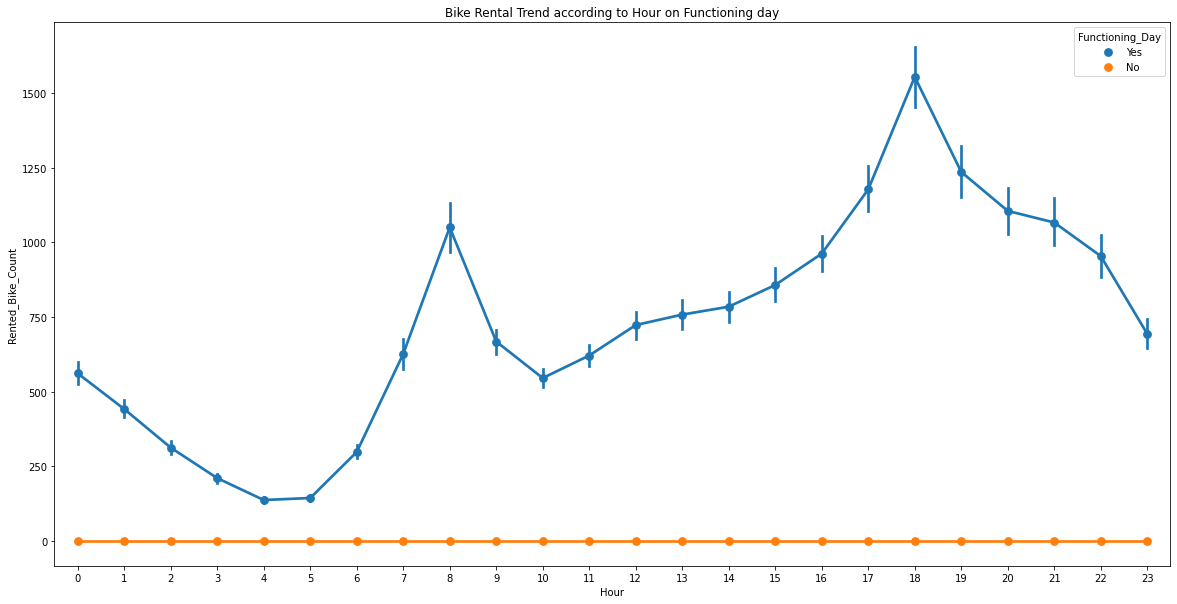

In [27]:

## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

#Observation
1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.

(if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.

So,its better to drop the column.)

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

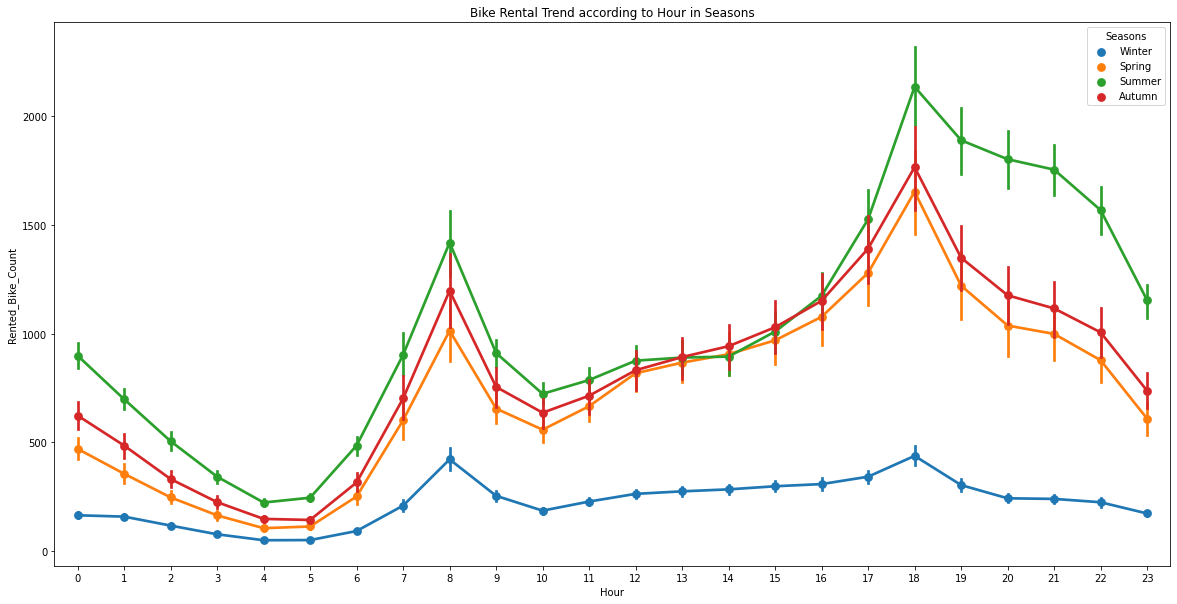

In [28]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

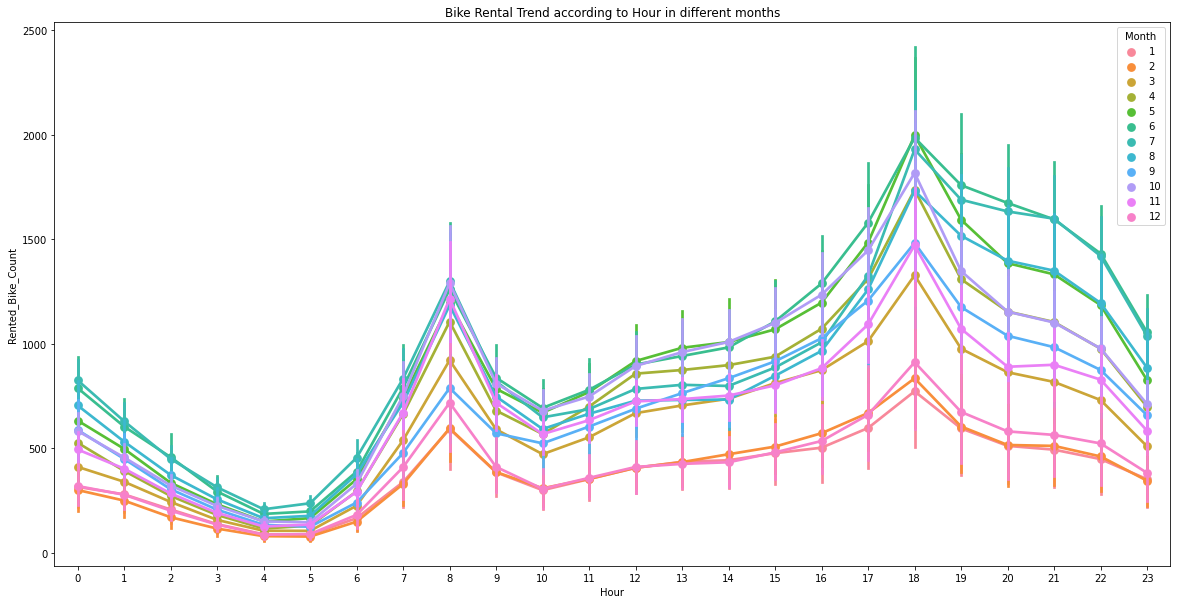

In [29]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")
     

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

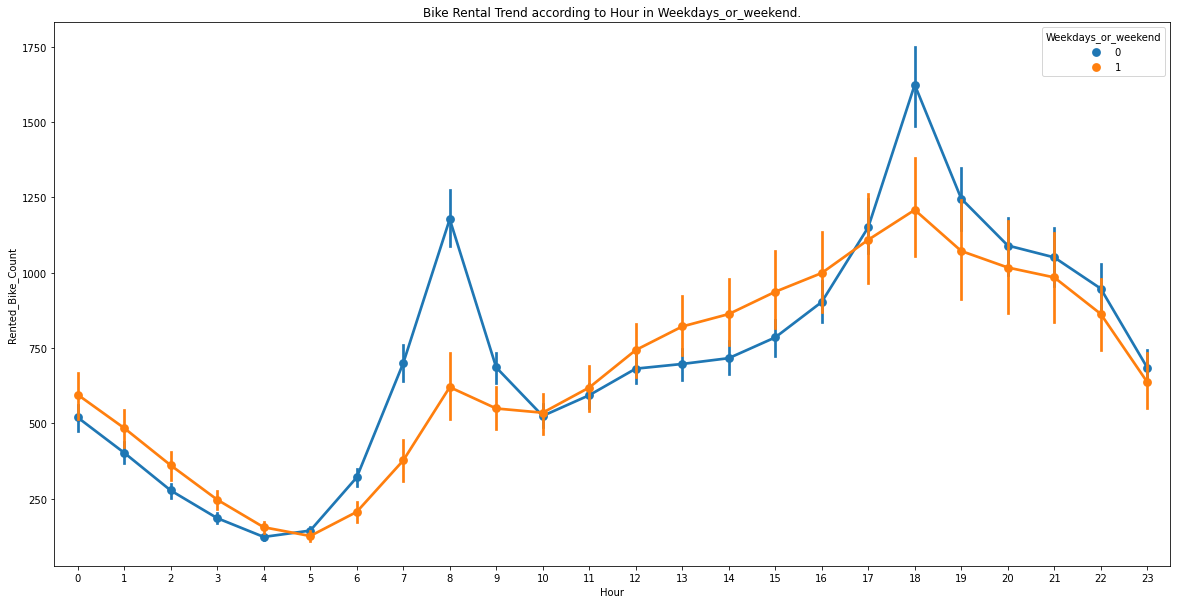

In [30]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend


#Let's check distribution of target variable- "Bike Rented Count"


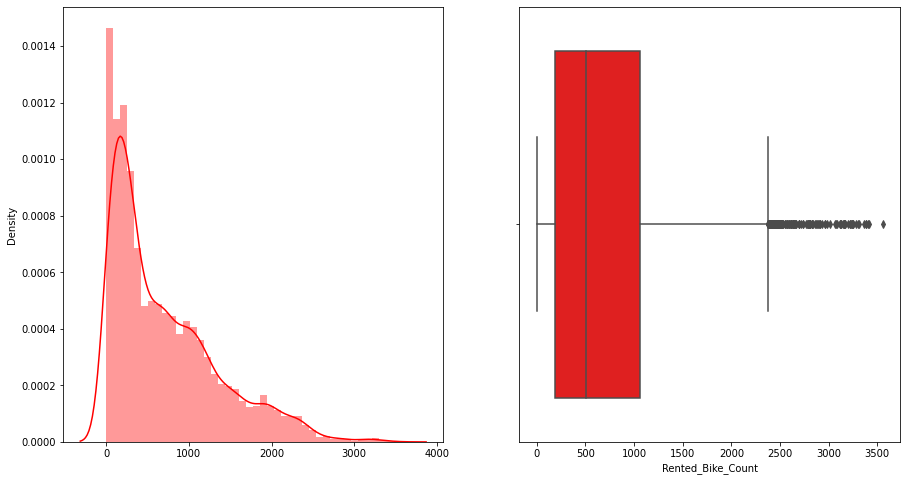

In [31]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

In [32]:
###  Our target varibale's distribution is slightly right skewed. 

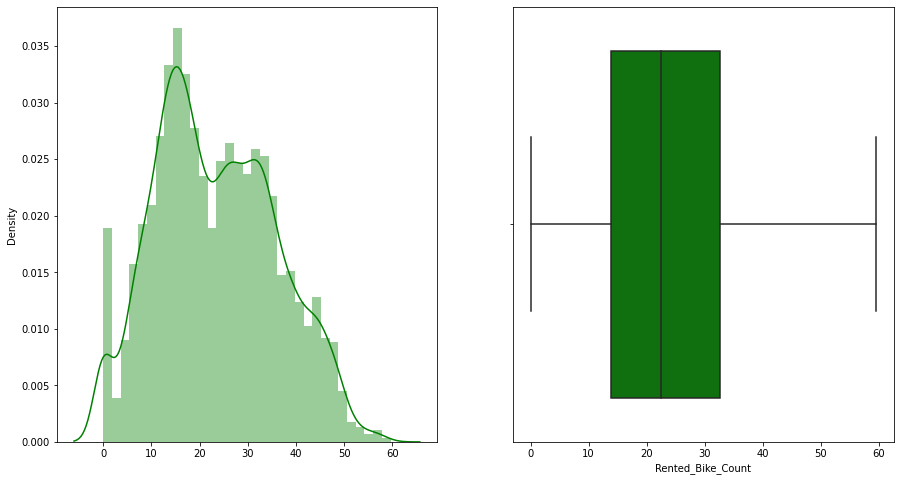

In [33]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.

#Let's check distribution of independent variables

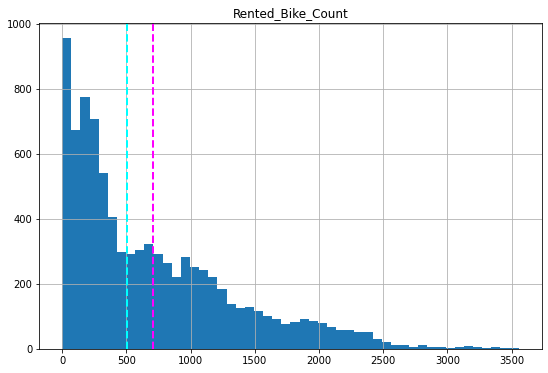

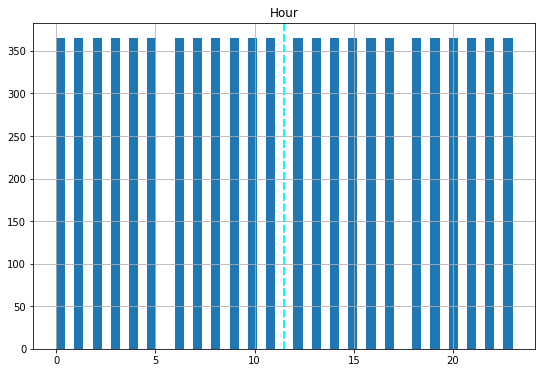

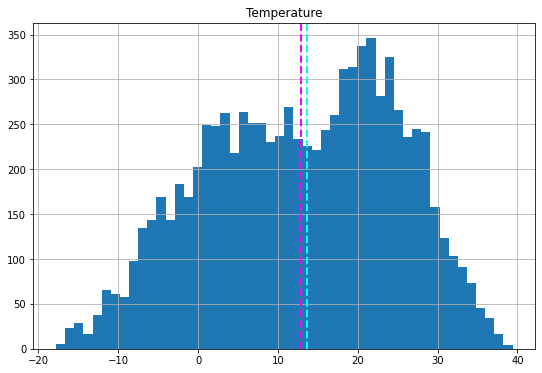

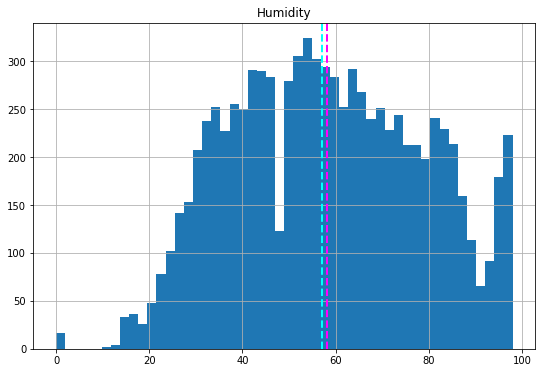

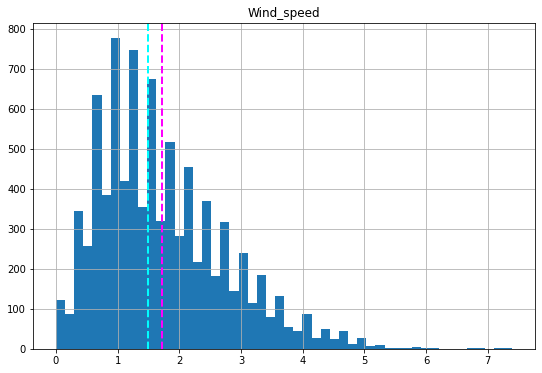

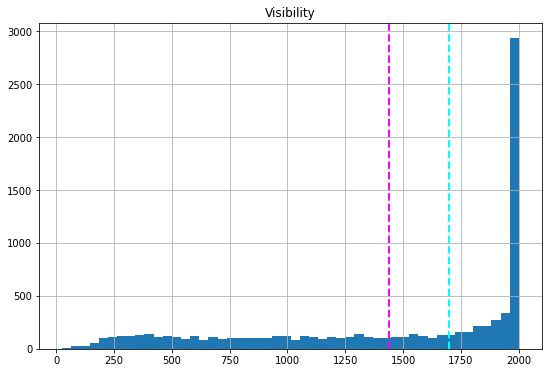

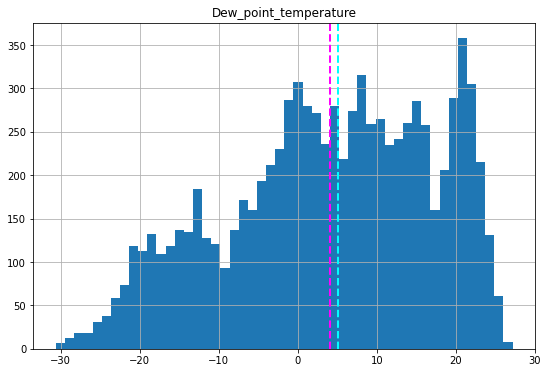

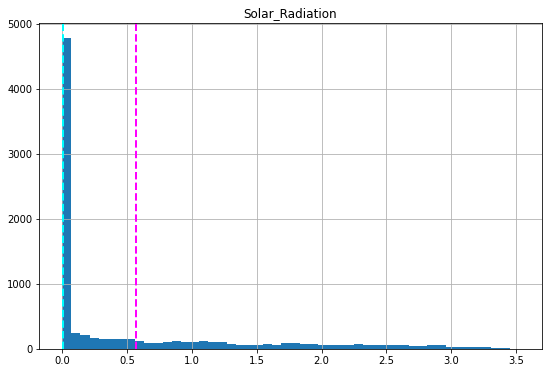

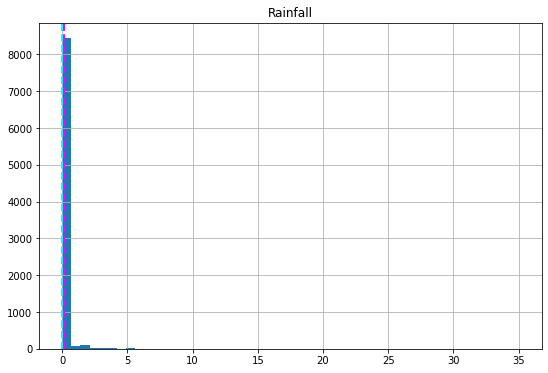

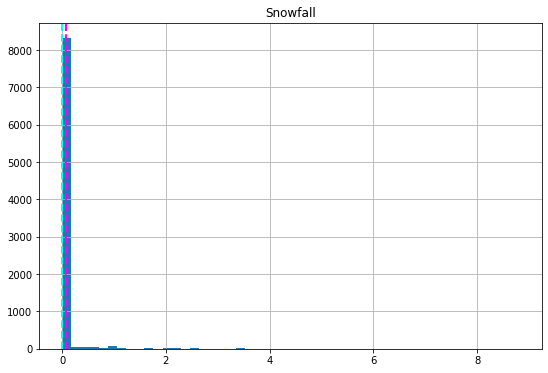

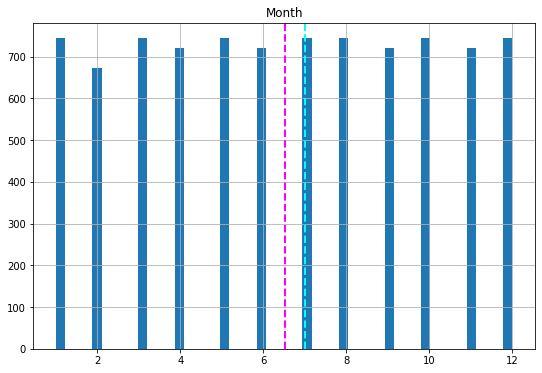

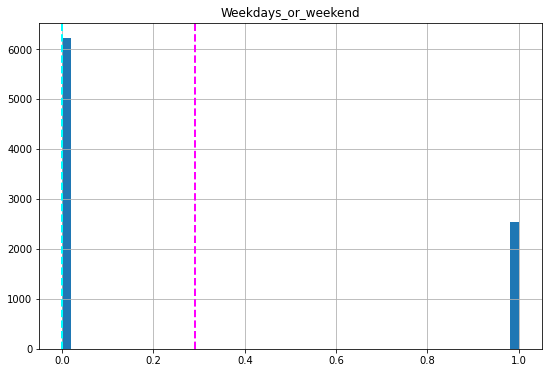

In [34]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

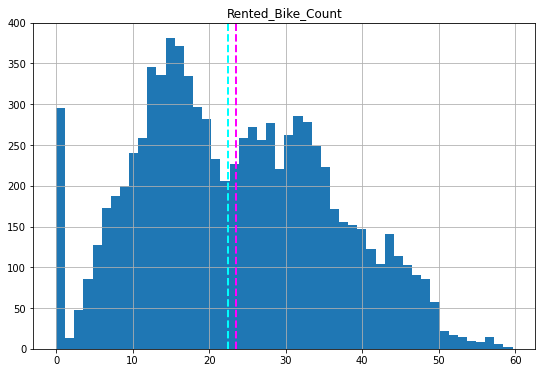

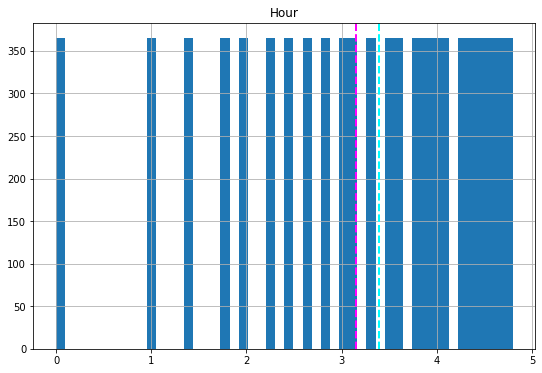

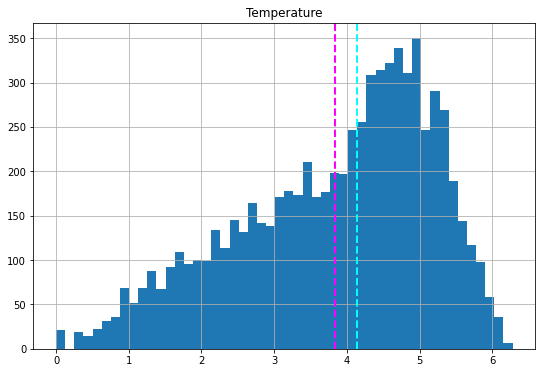

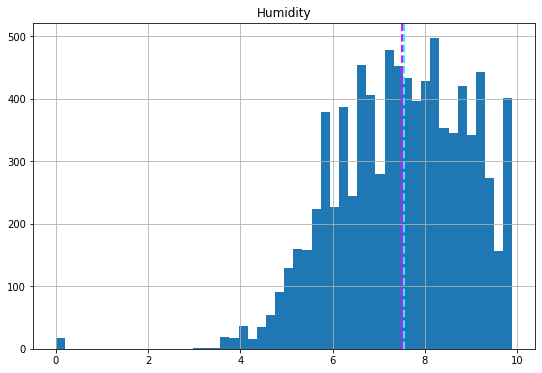

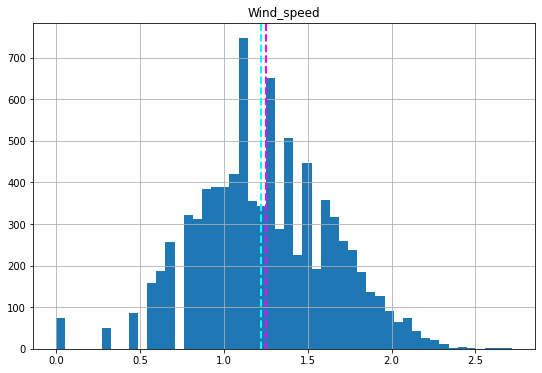

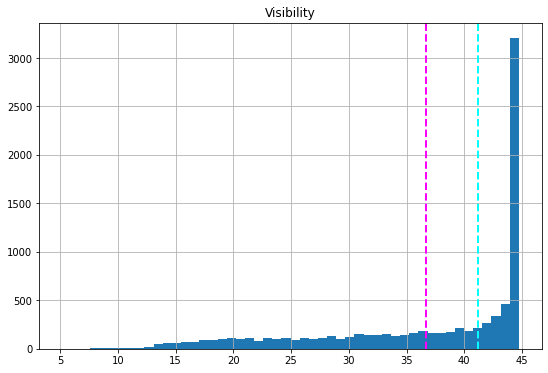

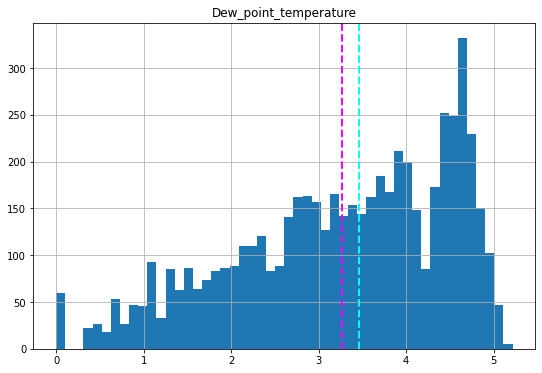

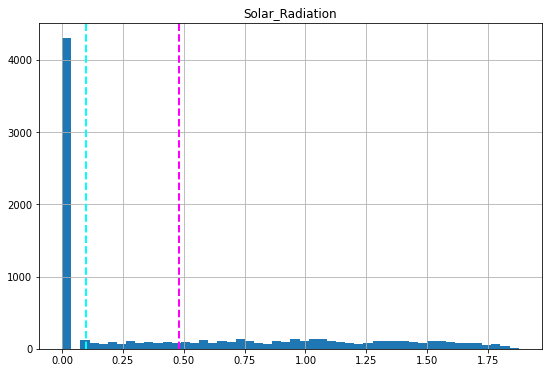

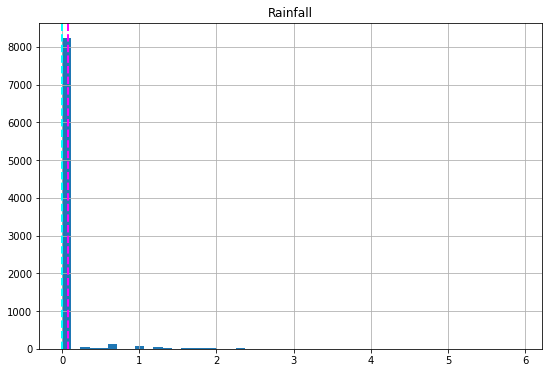

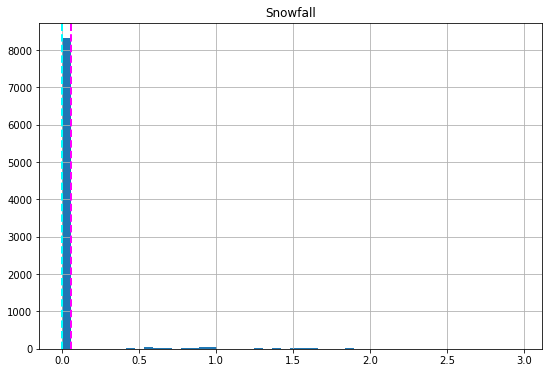

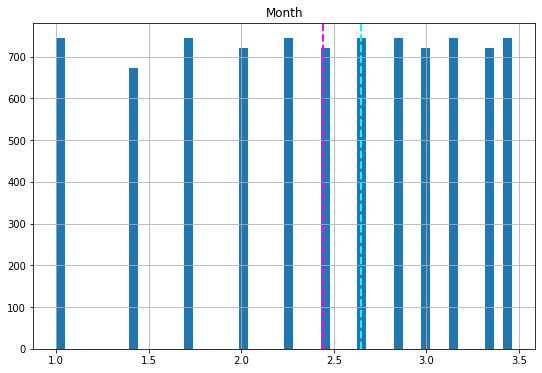

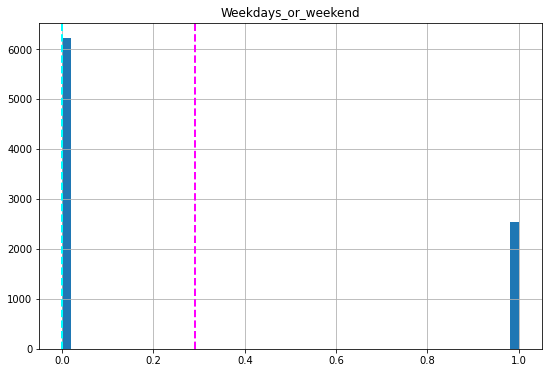

In [35]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable).

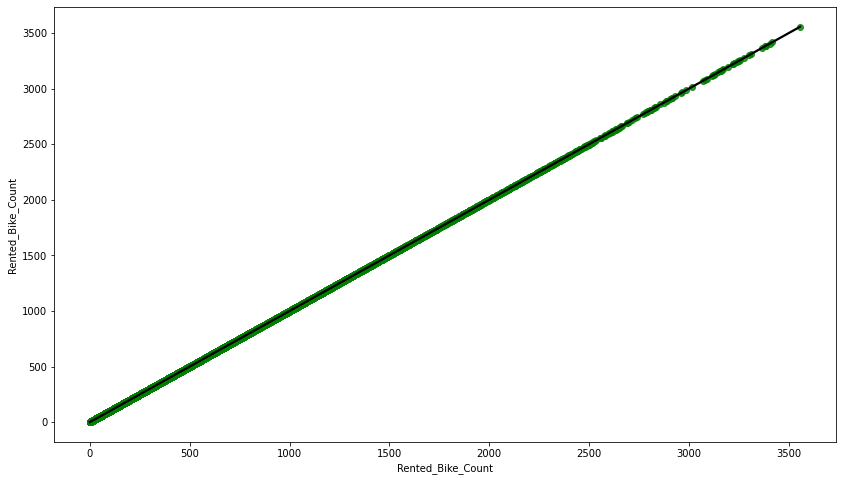

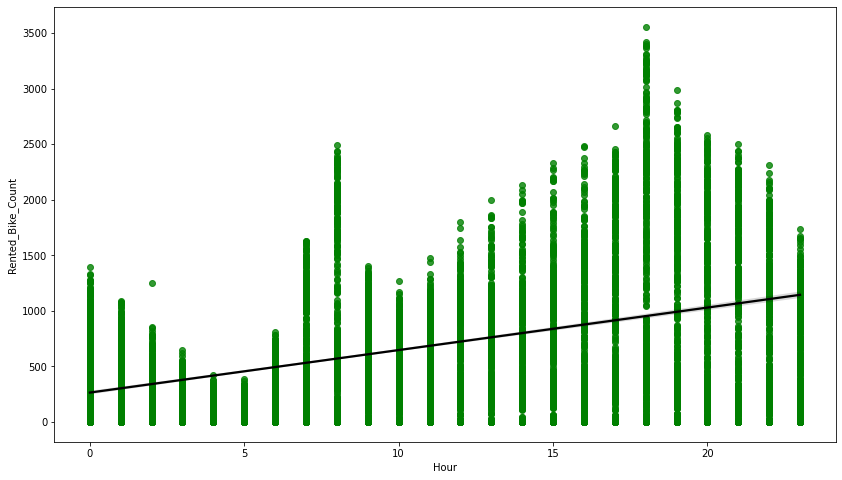

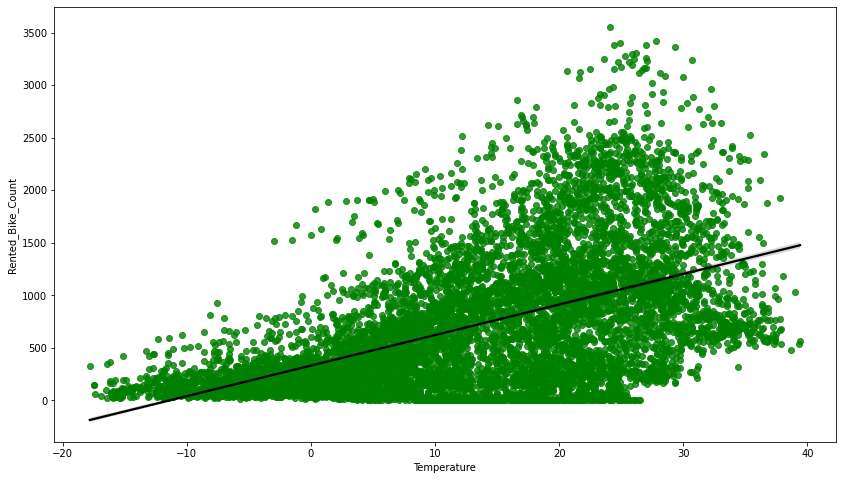

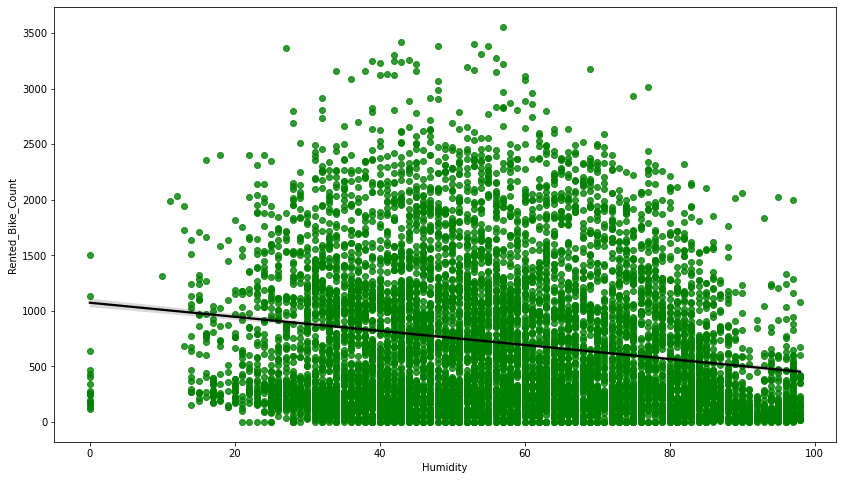

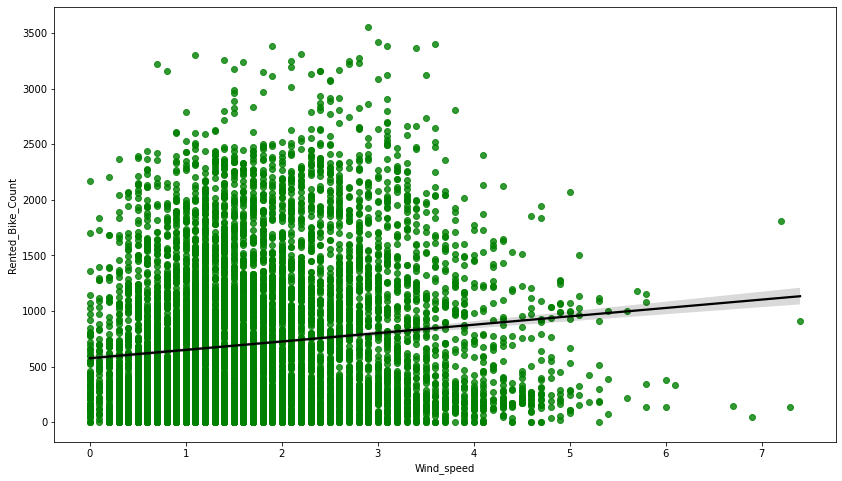

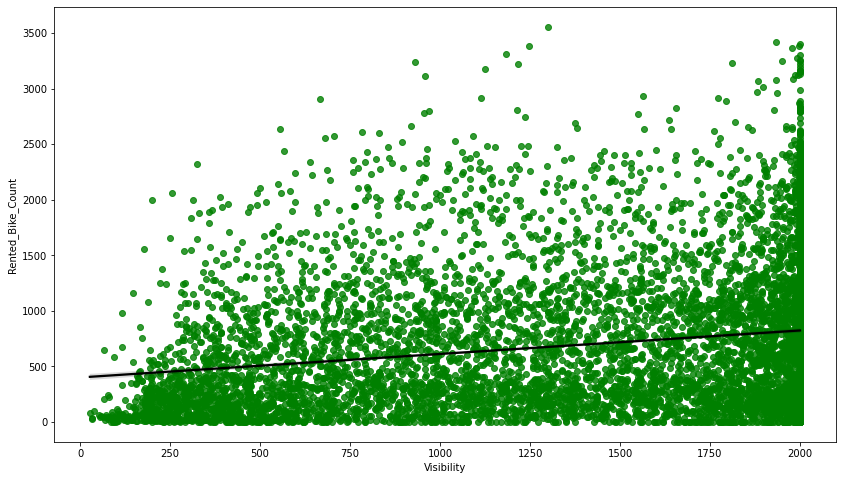

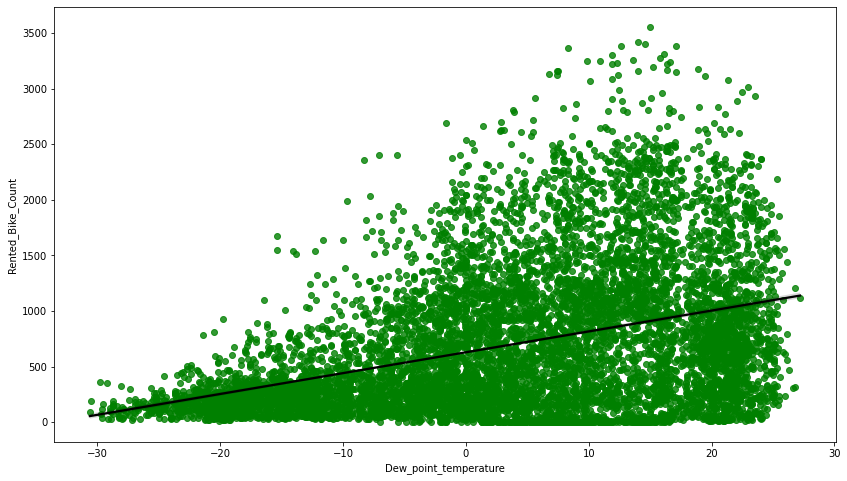

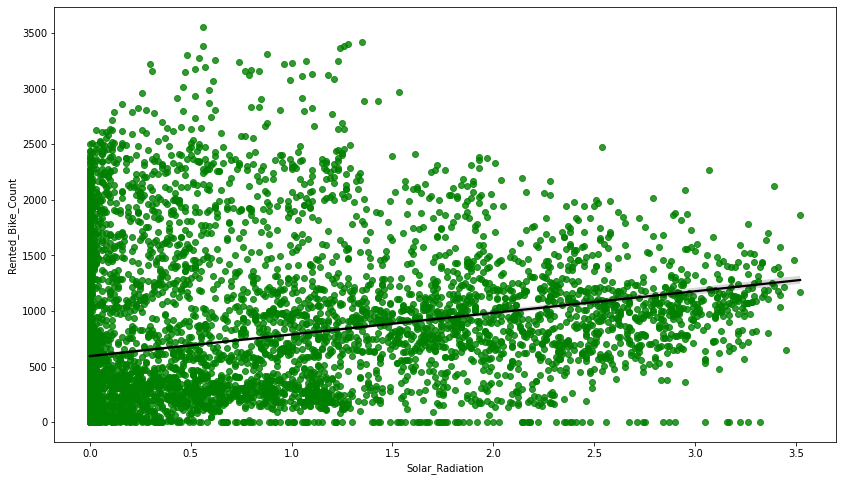

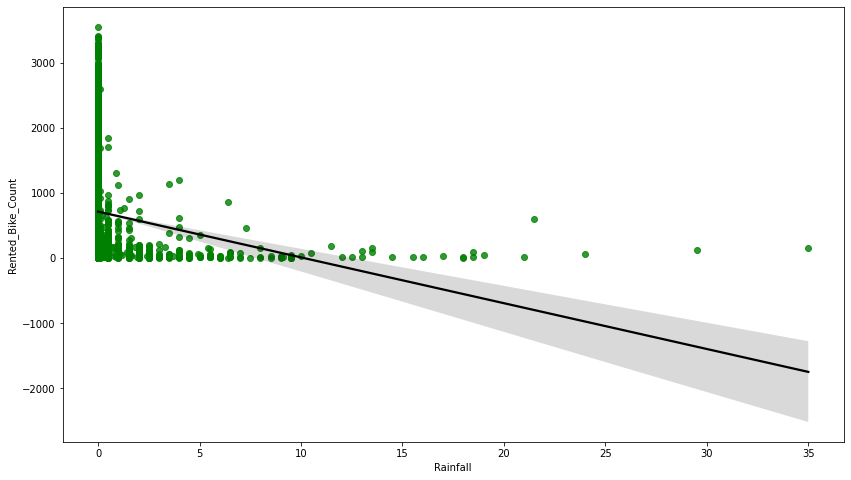

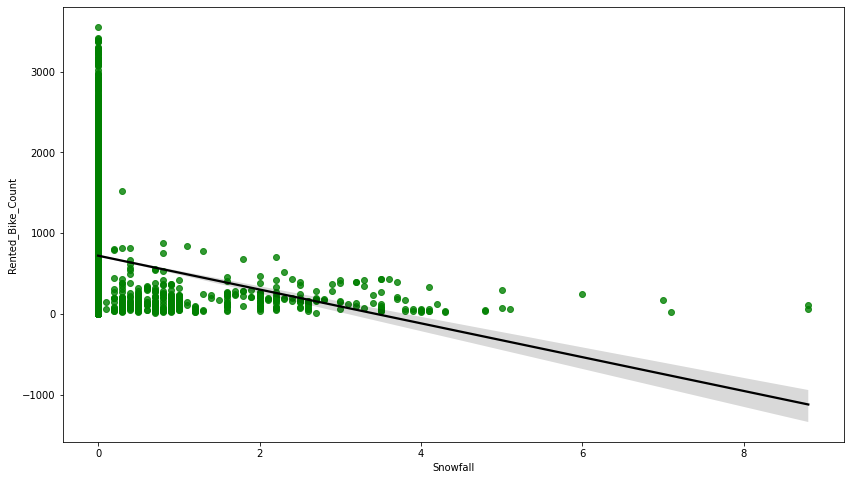

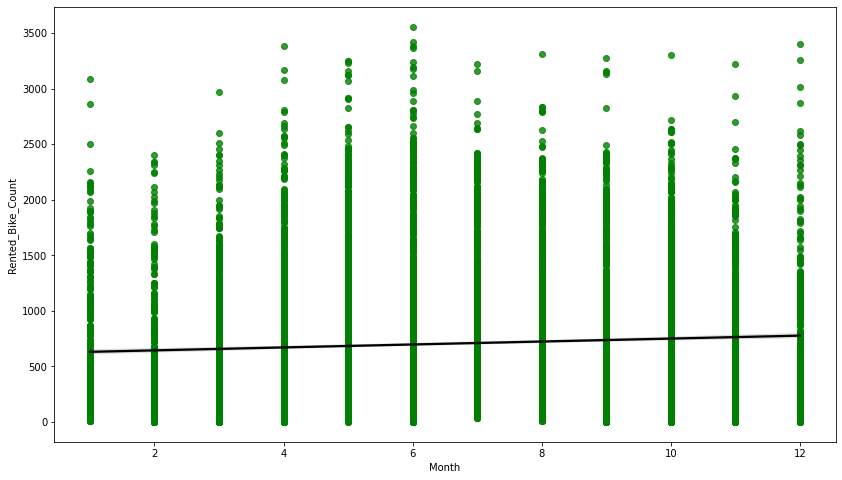

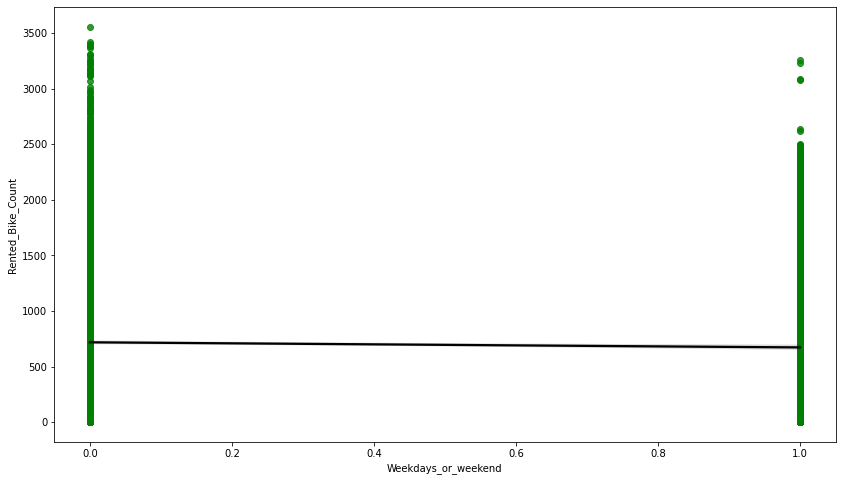

In [36]:
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

#Hour:
1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

#Temperature:
1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.

2) But for normal temperature the Bike rent count is very high.

#Humidity
1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

#Wind Speed:
1) upto wind speed 4 m/s there is good bike rent count.

#Visibility
1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

#Dew Point Temperature
1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

#Solar radiation
1)Here the amount of rented bikes is huge, when there is solar radiation.

#Rainfall And snowfall
1) Its very obivious that people usually do not like ride bikes in rain and snowfall.

#Checking Corelation between dependent and independent variable.

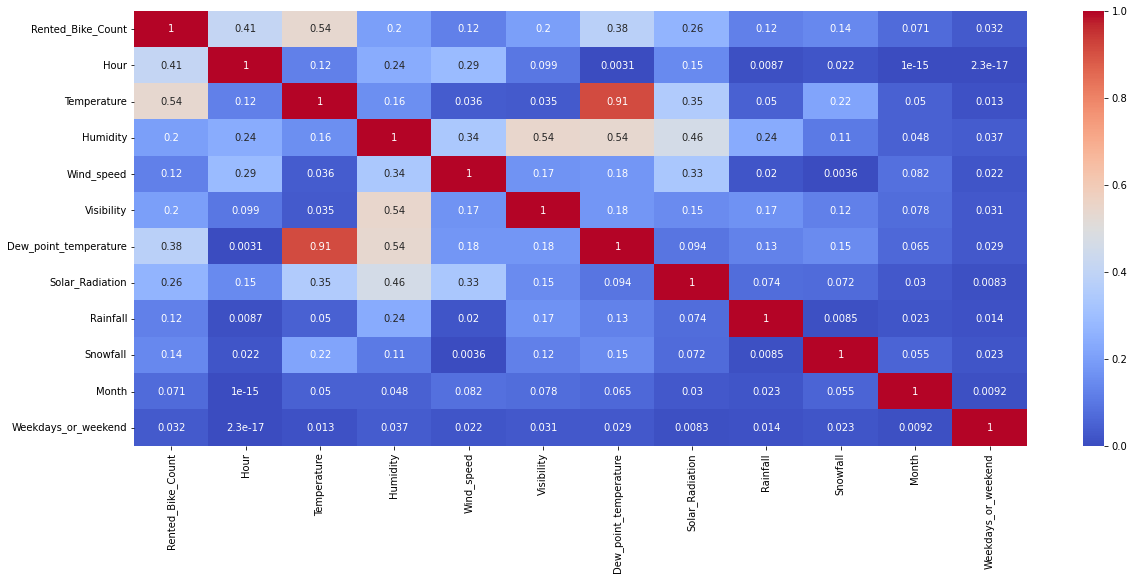

In [38]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')